In [125]:
import pandas as pd 
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [126]:
train=pd.read_csv(r'C:\Users\My PC\Desktop\Machine Learning\Hackerearth\analyticssentinlp\train.csv')
test=pd.read_csv(r'C:\Users\My PC\Desktop\Machine Learning\Hackerearth\analyticssentinlp\test.csv')
sample=pd.read_csv(r'C:\Users\My PC\Desktop\Machine Learning\Hackerearth\analyticssentinlp\sample.csv')

In [201]:
sample.head()

,id,label
0,7921,0
1,7922,0
2,7923,0
3,7924,0
4,7925,0


In [128]:
train.shape
test.shape
sample.shape

(7920, 3)

(1953, 2)

(1953, 2)

In [129]:
X=train['tweet']

In [130]:
X.shape[0]

7920

In [131]:
Y=pd.get_dummies(train.label)

In [132]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [133]:
sw = stopwords.words('english')


In [134]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [135]:
train['tweet'] = train['tweet'].apply(remove_punctuation)

In [184]:
test['tweet'] = test['tweet'].apply(remove_punctuation)

In [136]:
# train['tweet']

In [137]:
def stopword(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [138]:
train['tweet']=train['tweet'].apply(stopword)

In [185]:
test['tweet'] = test['tweet'].apply(stopword)

In [139]:
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [140]:
train['tweet']=train['tweet'].apply(stemming)

In [186]:
test['tweet'] = test['tweet'].apply(stemming)

In [141]:
review_lines = train['tweet'].values.tolist()

In [142]:
vectorizer = CountVectorizer(analyzer='word',max_features=6000, binary=True)
vectorizer.fit(train['tweet'])

CountVectorizer(binary=True, max_features=6000)

In [143]:
X = vectorizer.transform(train['tweet']).todense()
y = train['label'].values
X.shape, y.shape

((7920, 6000), (7920,))

In [144]:
X=X[:,:10000]

In [145]:
X.shape

(7920, 6000)

In [42]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020)

In [44]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [45]:
pred=model.predict(X_test)

In [46]:
print(f1_score(pred,y_test))

0.7515299877600979


<h2>Implementation of rnn and word2vec model</h2> 

In [107]:
import warnings
warnings.filterwarnings('ignore')

# Modules for data manipulation
import numpy as np
import pandas as pd
import re

# Modules for visualization
import matplotlib.pyplot as plt
import seaborn as sb

# Tools for preprocessing input data
from bs4 import BeautifulSoup
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Tools for creating ngrams and vectorizing input data
from gensim.models import Word2Vec, Phrases

# Tools for building a model
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Bidirectional
from keras.layers.embeddings import Embedding
from keras.preprocessing.sequence import pad_sequences

# Tools for assessing the quality of model prediction
from sklearn.metrics import accuracy_score, confusion_matrix


In [146]:
from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer()
s=[]
for i in range(0,len(review_lines)):
    lines=tk.tokenize(review_lines[i])
    s.append(lines)

In [187]:
final=[]
for i in range(0,len(test.tweet)):
    lines=tk.tokenize(test.tweet[i])
    final.append(lines)

In [148]:
import gensim

embedding_vector_size = 150
# now training embeddings for each word 
model_1 = gensim.models.Word2Vec(sentences = s, size=embedding_vector_size, min_count=1, window=5, workers=4 )

# to get total number of unique words
words = list(model_1.wv.vocab)

print("vocab size:", len(words))

vocab size: 22984


(array([ 189., 1672., 3629., 1584.,  210.,  157.,  297.,  151.,   23.,
           8.]),
 array([  5. ,  36.7,  68.4, 100.1, 131.8, 163.5, 195.2, 226.9, 258.6,
        290.3, 322. ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'length of words')

Text(0, 0.5, 'frequency')

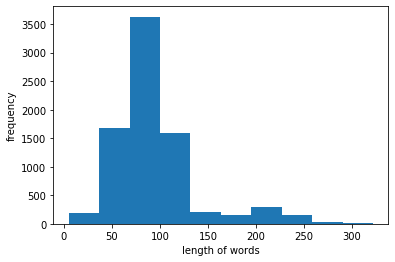

In [149]:
leng=0
length = [(leng + len(x)) for x in review_lines]
plt.hist(length)
plt.xlabel('length of words')
plt.ylabel('frequency')

In [150]:
import math
avg_length = sum(length)/len(review_lines)

# if words are more than max_length then they are skipped, if less than padding with 0 is done
print(avg_length)

94.5199494949495


In [189]:
import math
lengthf = [(leng + len(x)) for x in test.tweet]
avg_lengthf = sum(lengthf)/len(test.tweet)

# if words are more than max_length then they are skipped, if less than padding with 0 is done
print(avg_lengthf)

91.96722990271377


In [151]:
#max_len = math.ceil(avg_length)             # this is used to decide how man words in seq to keep
max_len = math.ceil(avg_length) 

In [152]:
max_features = 6000
tokenizer = Tokenizer(num_words=max_features)       #keeps 6000 most common words
train_test_data = s                       # contains word tokens extracted from lines
tokenizer.fit_on_texts(train_test_data)
sequence = tokenizer.texts_to_sequences(train_test_data)
#above code is similar  to ohe 
train_test_data = pad_sequences(sequence, maxlen = max_len)

In [190]:
       #keeps 6000 most common words
train_test_dataf = final                       # contains word tokens extracted from lines
tokenizer.fit_on_texts(train_test_dataf)
sequence = tokenizer.texts_to_sequences(train_test_dataf)
#above code is similar  to ohe 
train_test_dataf = pad_sequences(sequence, maxlen = max_len)

In [155]:
len(tokenizer.word_index)

22984

In [156]:
vocab_size = len(tokenizer.word_index)+1
embedding_matrix = np.zeros((vocab_size, embedding_vector_size))
# +1 is done because i starts from 1 instead of 0, and goes till len(vocab)
for  word, i in tokenizer.word_index.items():#we are taking word 
    embedding_vector = model_1.wv[word]# then getting corresponding vector from word2vec
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [168]:
Xn=train_test_data
Yn=train.label

In [170]:
Xn.shape
Yn.shape

(7920, 95)

(7920,)

In [176]:
X_train, X_test, y_train, y_test = train_test_split(Xn , Yn, test_size=0.2, random_state=42, shuffle=True)

In [177]:
X_train.shape

(6336, 95)

In [178]:
model = Sequential()

model.add(Embedding(input_dim = vocab_size, output_dim = embedding_vector_size, 
                    input_length = max_len, weights = [embedding_matrix]))
model.add(Bidirectional(LSTM(64, dropout=0.25, recurrent_dropout=0.1)))
model.add(Dense(10))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [179]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [180]:
model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['acc'])
print(model.summary())

history = model.fit(X_train, y_train, epochs = 30, batch_size = 700, validation_data=(X_test, y_test),callbacks = [learning_rate_reduction])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 95, 150)           3447750   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               110080    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 3,559,131
Trainable params: 3,559,131
Non-trainable params: 0
_________________________________________________________________
None
Train on 6336 samples, validate on 1584 samples
Epoch 1/30
6336/6336 [==============================] - 8

Text(0, 0.5, 'loss')

Text(0.5, 0, 'epoch')

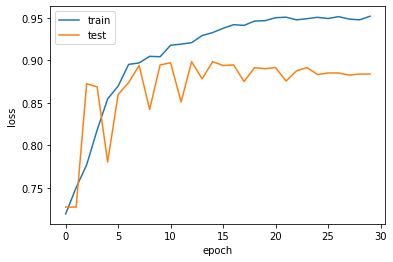

In [181]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [182]:
y_test_pred = model.predict(X_test)

In [183]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_test_pred, average = 'weighted')

0.944997026105967

In [191]:
y_pred = model.predict(train_test_dataf)

In [192]:
predictions = [1 if (x>0.5) else 0 for x in y_pred ]

In [197]:
predictions #= pd.Series(predictions)


0       0
1       0
2       0
3       1
4       0
5       1
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      1
17      0
18      0
19      1
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1923    0
1924    1
1925    0
1926    0
1927    0
1928    1
1929    0
1930    0
1931    1
1932    0
1933    0
1934    0
1935    0
1936    0
1937    1
1938    0
1939    0
1940    0
1941    1
1942    0
1943    0
1944    0
1945    0
1946    0
1947    0
1948    0
1949    0
1950    0
1951    0
1952    0
Length: 1953, dtype: int64

In [199]:
ids=test.id

In [202]:
submission = pd.DataFrame({'id': ids, 'label':predictions})
submission.to_csv(r'C:\Users\My PC\Desktop\Machine Learning\Hackerearth\analyticssentinlp\word2vec.csv',index=False)

Will further implement BERT and try other models.
